## Contents

### Regression Analysis

### Scatterplottings

### Supervised Machine Learning Test and Train Set

# 6.4 Machine Learning

In [1]:
#Importing Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Making Path do data as a string
path = r'C:\Users\bbissonette\Documents\Data Analytics Course\Acheivement 6'

In [12]:
# Importing Fluid_Lab_Invoicing_Raw data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'listings_clean.csv'), index_col = False)

# Prep for regression analysis

In [13]:
df.head()

Unnamed: 0     id                                               name  \
0           0   2818           Quiet Garden View Room & Super Fast WiFi   
1           1   3209                  Quiet apt near center, great view   
2           2  20168         100%Centre-Studio 1 Private Floor/Bathroom   
3           3  25428                Lovely apt in City Centre (Jordaan)   
4           4  27886  Romantic, stylish B&B houseboat in canal district   

   host_id host_name                           neighbourhood   latitude  \
0     3159    Daniel  Oostelijk Havengebied - Indische Buurt  52.365755   
1     3806   Maartje                              Westerpark  52.390225   
2    59484      Alex                            Centrum-Oost  52.365087   
3    56142      Joan                            Centrum-West  52.373114   
4    97647      Flip                            Centrum-West  52.386727   

   longitude        room_type  price  ...  calculated_host_listings_count  \
0   4.941419     Private room     59  ...                               1   
1   4.873924  Entire home/apt    160  ...                               1   
2   4.893541  Entire home/apt     80  ...                               2   
3   4.883668  Entire home/apt    125  ...                               2   
4   4.892078     Private room    150  ...                               1   

   availability_365  host_total_listings_count  property_type  accommodates  \
0                44                        1.0      Apartment             2   
1                47                        1.0      Apartment             5   
2               198                        2.0      Townhouse             2   
3               141                        2.0      Apartment             3   
4               199                        1.0      Houseboat             2   

  bathrooms  bedrooms  beds  guests_included  review_scores_rating  
0       1.5       1.0   2.0                1                  97.0  
1       1.0       2.0   2.0                2                  96.0  
2       1.0       1.0   1.0                2                  87.0  
3       1.0       1.0   1.0                2                 100.0  
4       1.0       1.0   1.0                1                  99.0  

[5 rows x 22 columns]

In [14]:
df = df.drop(columns = ['Unnamed: 0'])

In [48]:
sub = df [['latitude','longitude','price','availability_365','accommodates','bathrooms','bedrooms','beds',]]

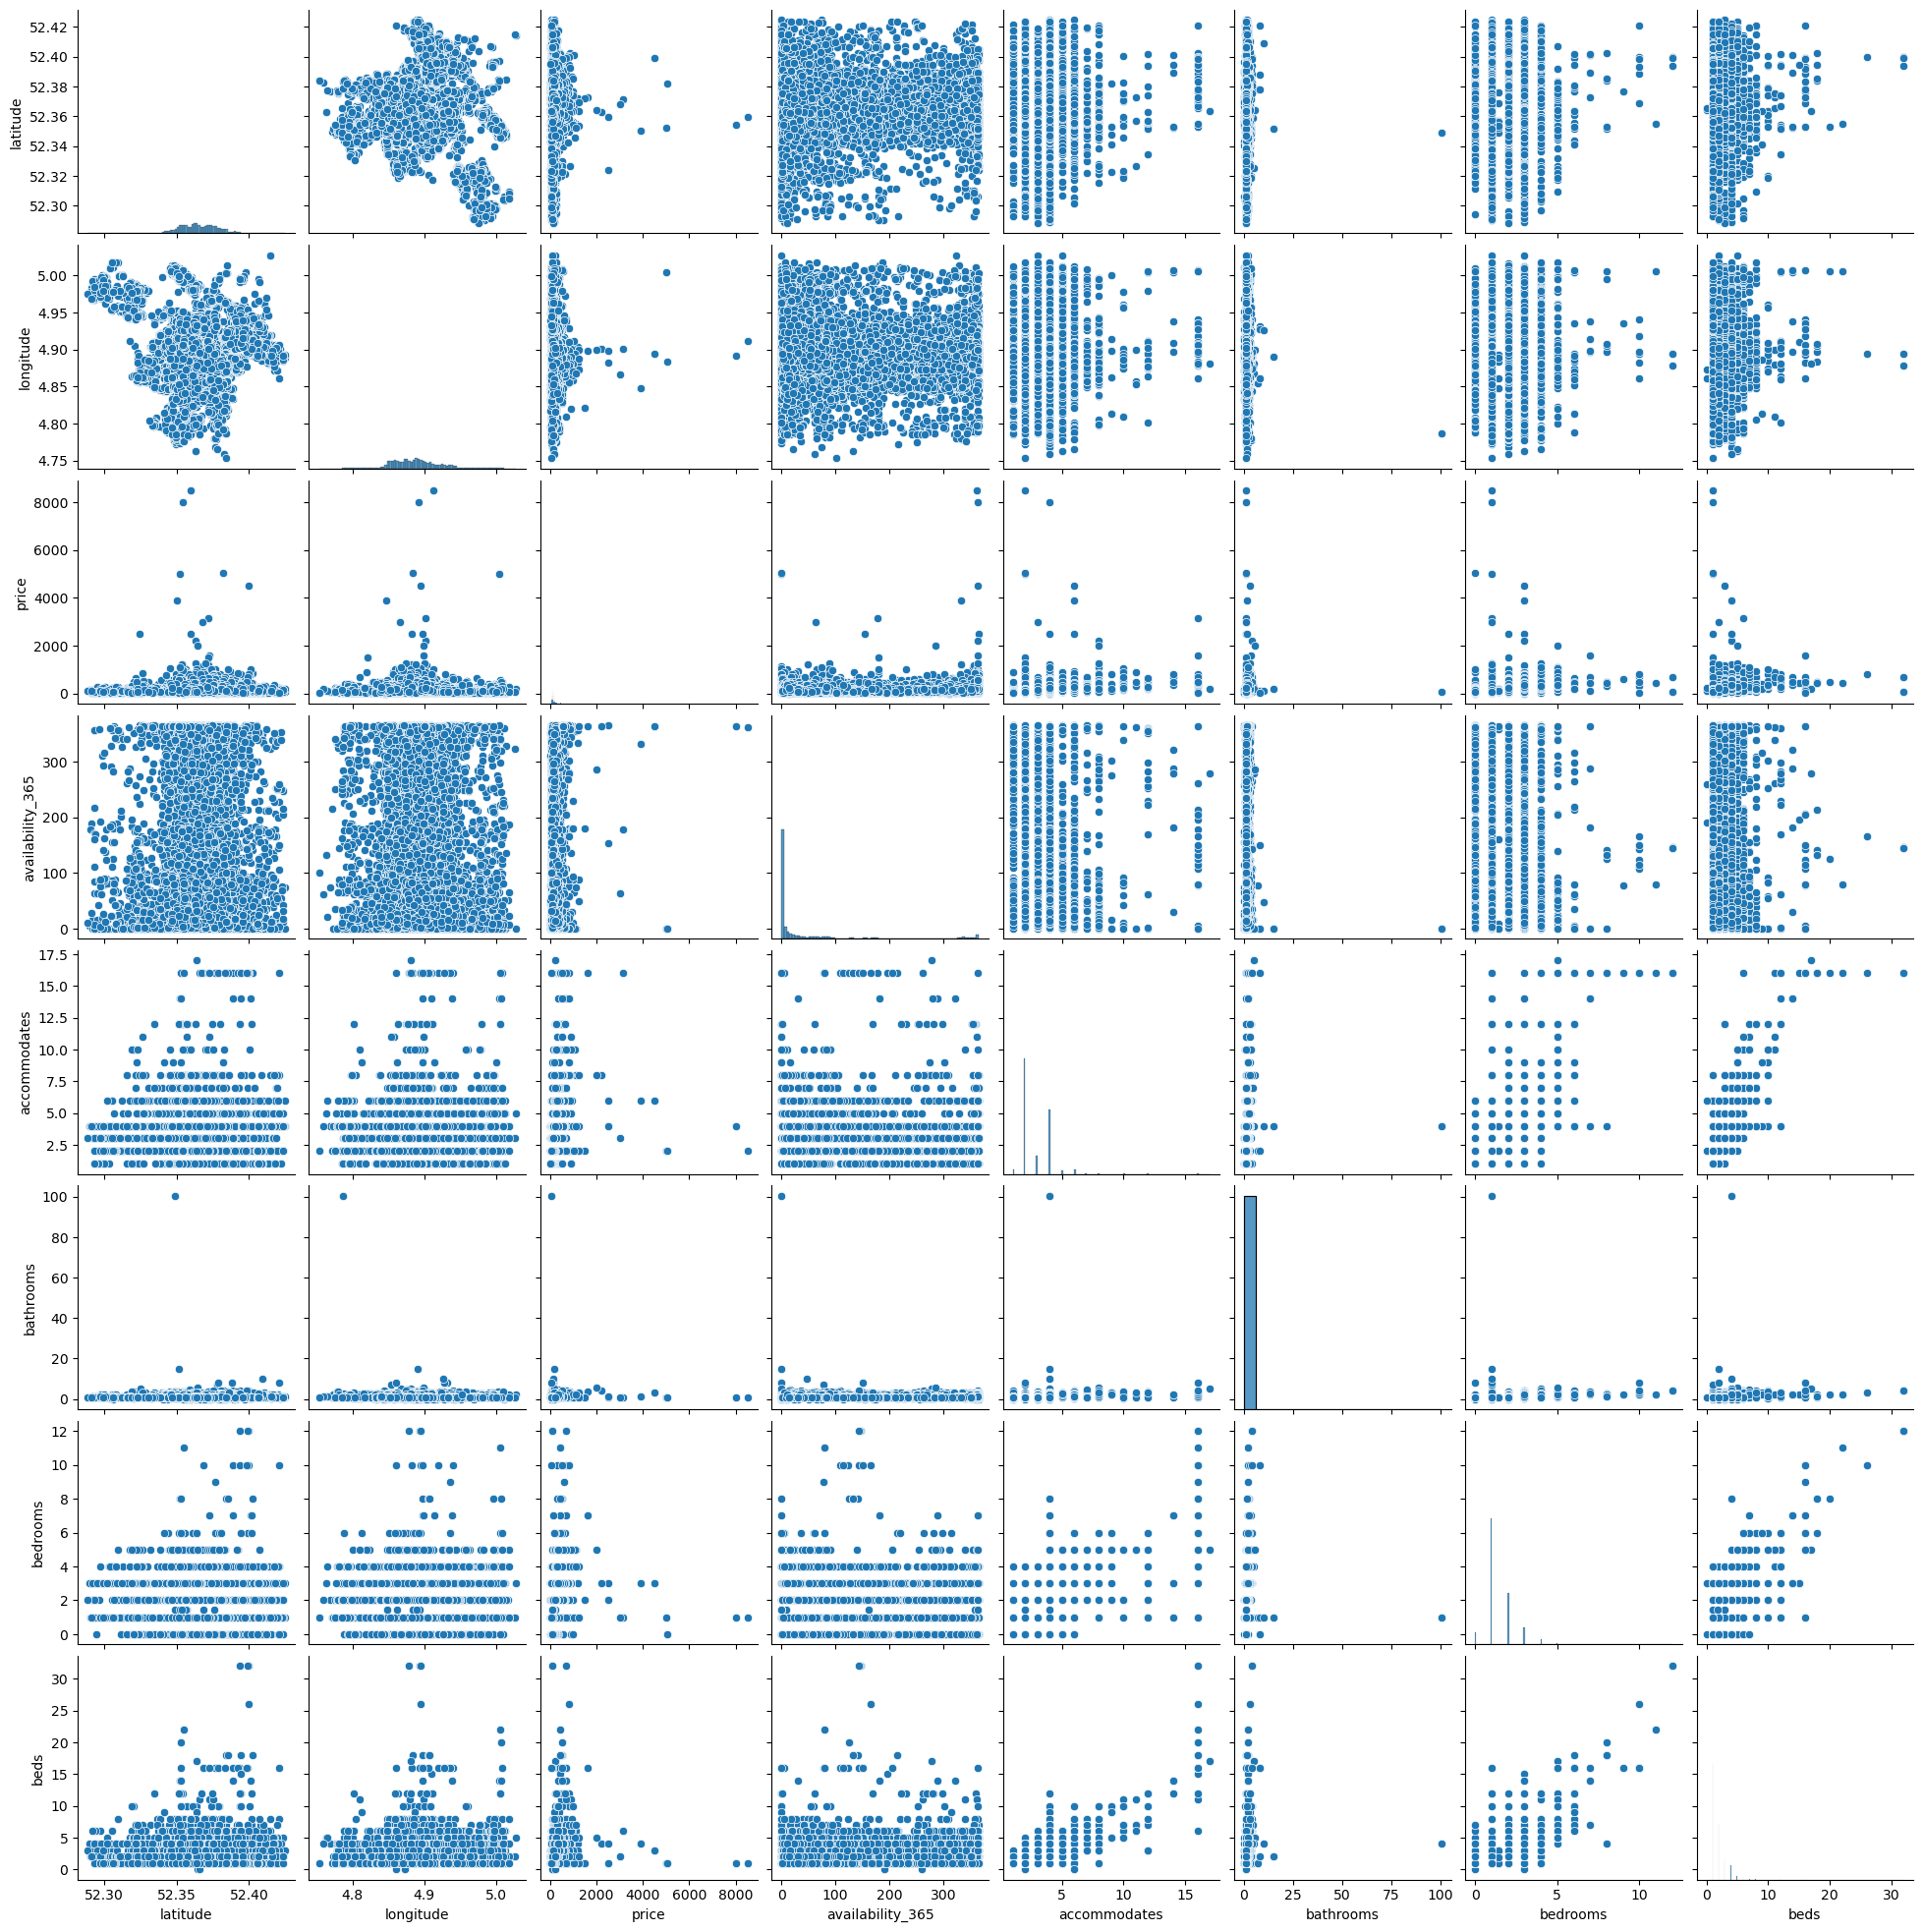

In [50]:
# Create a pair plot 
g = sns.pairplot(sub)

Ill test the relatioship between the price of the Airbnb listing in Amsterdam and How many bedroom are offered in the listing. 

My Hypothesis will be that the price will increase as the number of bedrooms increase.

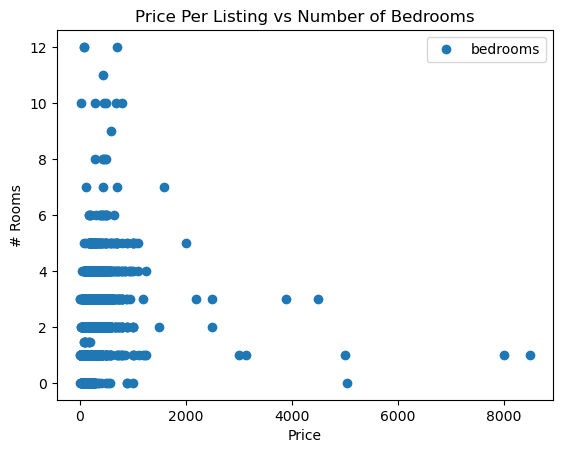

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'price', y='bedrooms',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price Per Listing vs Number of Bedrooms')  
plt.xlabel('Price')  
plt.ylabel('# Rooms')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['price'].values.reshape(-1,1)
y = df['bedrooms'].values.reshape(-1,1)

In [30]:
X

array([[ 59],
       [160],
       [ 80],
       ...,
       [ 80],
       [ 55],
       [220]], dtype=int64)

In [32]:
y

array([[1.],
       [2.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Create a regression object.

regression = LinearRegression() 

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

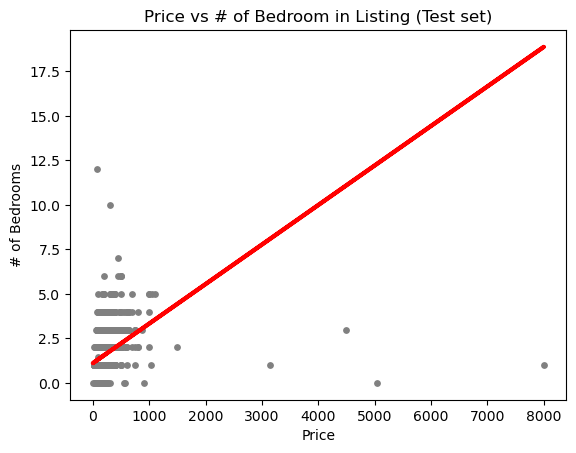

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs # of Bedrooms in Listing (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('# of Bedrooms')
plot_test.show()

The Line fit pretty well. As the number of Bedrooms increases the price of the airbnb also increases. This makes sense. 

In [38]:
# Create objects that contain the model summary statistics.
# Creating mean squared error and R2 score
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [39]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00222054]]
Mean squared error:  0.727568392209617
R2 score:  0.03426635727492722


In [40]:
y_predicted

array([[1.26545548],
       [1.36760029],
       [1.32096896],
       ...,
       [1.5319202 ],
       [1.32096896],
       [1.58743368]])

In [41]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0      1.0   1.265455
1      1.0   1.367600
2      0.0   1.320969
3      1.0   1.440878
4      2.0   1.554126
5      1.0   1.498612
6      0.0   1.320969
7      1.0   1.309866
8      2.0   1.887206
9      4.0   1.554126
10     1.0   1.554126
11     1.0   1.498612
12     2.0   1.531920
13     2.0   1.387585
14     1.0   1.243250
15     0.0   1.265455
16     2.0   1.447540
17     2.0   1.443099
18     2.0   1.998233
19     1.0   1.336513
20     1.0   1.374262
21     2.0   1.325410
22     1.0   1.551905
23     1.0   1.365380
24     1.0   1.387585
25     1.0   1.443099
26     2.0   1.554126
27     1.0   1.254353
28     1.0   1.332072
29     2.0   1.440878

#### Regression Fitting the Training set

In [42]:
# Predict.

y_predicted_train = regression.predict(X_train) # Predicting X_train

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00222054]]
Mean squared error:  0.7058488039916163
R2 score:  0.1156693253306531


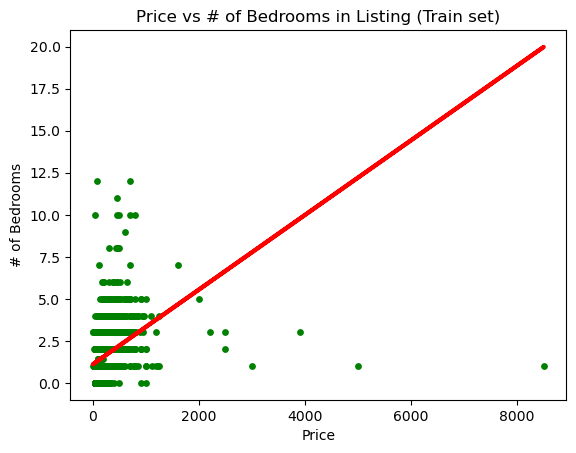

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs # of Bedrooms in Listing (Train set)')
plot_test.xlabel('Price')
plot_test.ylabel('# of Bedrooms')
plot_test.show()

The Trained set performed very well, pretty much identical to the test regression performed. I dont believe their is much if any data bias present. The Data is input to the systems directly by the hosts and pulled without manipulation. 